In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = pd.read_excel("Iris.xls")
iris.shape

(150, 5)

In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.groupby('iris').petallength.count()

iris
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: petallength, dtype: int64

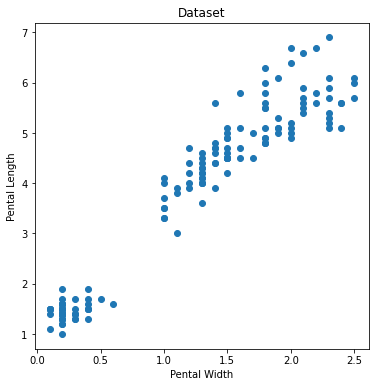

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(iris.petalwidth, iris.petallength)
plt.title('Dataset')
plt.xlabel("Pental Width")
plt.ylabel("Pental Length")
plt.show()

In [7]:
X = iris.drop(['sepallength', 'sepalwidth','iris'], axis=1) # phan cum theo 2 thu
X.head(3)

,petallength,petalwidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [9]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])

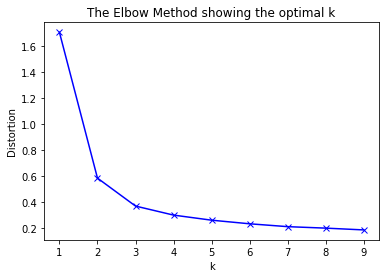

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[5.59583333 2.0375    ]
 [1.464      0.244     ]
 [4.26923077 1.34230769]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


In [12]:
X['iris'] = pd.Series(labels)

In [13]:
X.head()

,petallength,petalwidth,iris
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [14]:
X_test = np.array([[1.5, 0.4], [4.5,1.6], [5.7,2]])
pred = kmeans.predict(X_test)
pred

array([1, 2, 0])

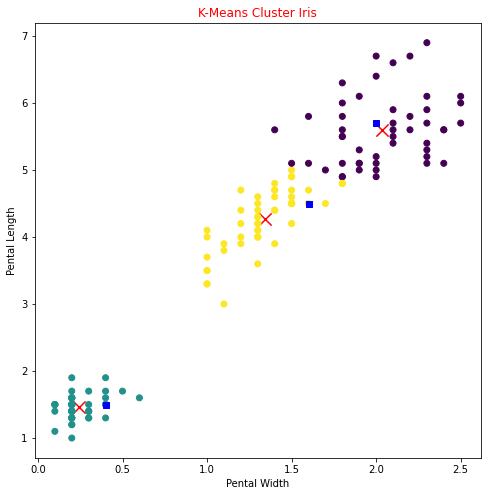

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(centroids[:, 1],centroids[:, 0], marker = "x", s=150, color='r')
plt.scatter(X.petalwidth, X.petallength, c=X.iris)
plt.scatter(X_test[:,1], X_test[:,0], marker="s", c='b')
plt.xlabel("Pental Width")
plt.ylabel("Pental Length")
plt.title("K-Means Cluster Iris", color="red")
plt.show()